In [1]:
import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = '/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/'#os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#os.chdir('/Users/samsonkoelle/manifoldflasso_jmlr/')
print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps
from codes.otherfunctions.multirun import get_grads_reps_pca2
from codes.otherfunctions.multiplot import plot_betas, plot_betas2reorder
from codes.geometer.RiemannianManifold import RiemannianManifold

/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients
/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients


In [8]:

#set parameters
n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
n_components = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time =.05 #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#run experiment
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
experiment = RigidEthanolPCA(dim, cor,var,ii,jj, cores, False, atoms4)
experiment.M, experiment.Mpca,projector  = experiment.generate_data(noise = False)

In [20]:
experiment.N.geom.rmetric.Gsvals.shape

(10000, 2)

In [9]:
experiment.q = n_components
experiment.dimnoise = dimnoise
experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, n_components, diffusion_time, dim)

initializing Geometry
executing laplacian.compute_laplacian_matrix
executing Laplacian.laplacian_matrix
pre _compute_laplacian
executing GeometricLaplacian._compute_laplacian
executing _normalize_laplacian
executing _normalize_laplacian
post _compute_laplacian
executing laplacian.compute_laplacian_matrix
executing Laplacian.laplacian_matrix
pre _compute_laplacian
executing GeometricLaplacian._compute_laplacian
executing _normalize_laplacian
executing _normalize_laplacian
post _compute_laplacian


/Users/samsonkoelle/anaconda3/envs/py35021518/lib/python3.5/site-packages/megaman/geometry/rmetric.py:95: RuntimeWarning: divide by zero encountered in reciprocal
  Einv = E**(-1)


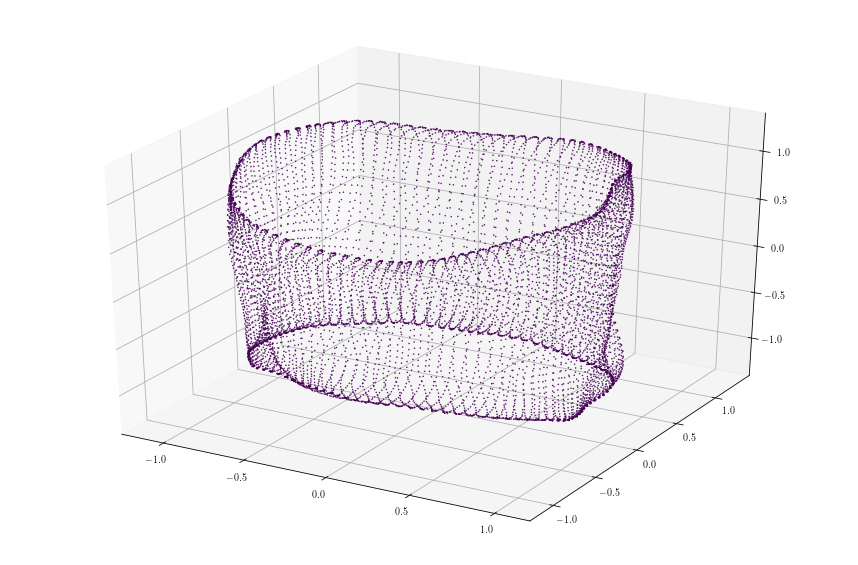

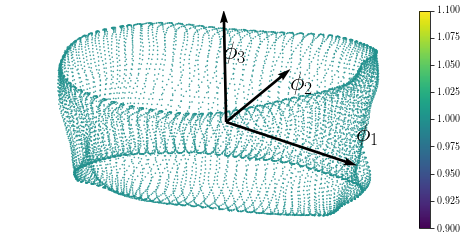

In [10]:
%matplotlib inline
experiment.N.plot([0,1,2], list(range(n)),np.ones(n),1,1, '/Users/samsonkoelle/g1')

In [11]:

#experiment.M.selected_points = np.random.choice(list(range(n)),nsel,replace = False)
nreps = 1
#import pickle
#with open('ethanolsavegeom1.pkl', 'wb') as output:
#    pickle.dump(experiment.N, output, pickle.HIGHEST_PROTOCOL)
print('pregrad',datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S"))
experiments = get_grads_reps_pca2(experiment, nreps, nsel,cores,projector)

pregrad April_13_2020_16_07_32


In [12]:
experiments = get_coeffs_reps(experiments, nreps, lambdas, itermax,nsel,tol)

preplot April_13_2020_16_08_09


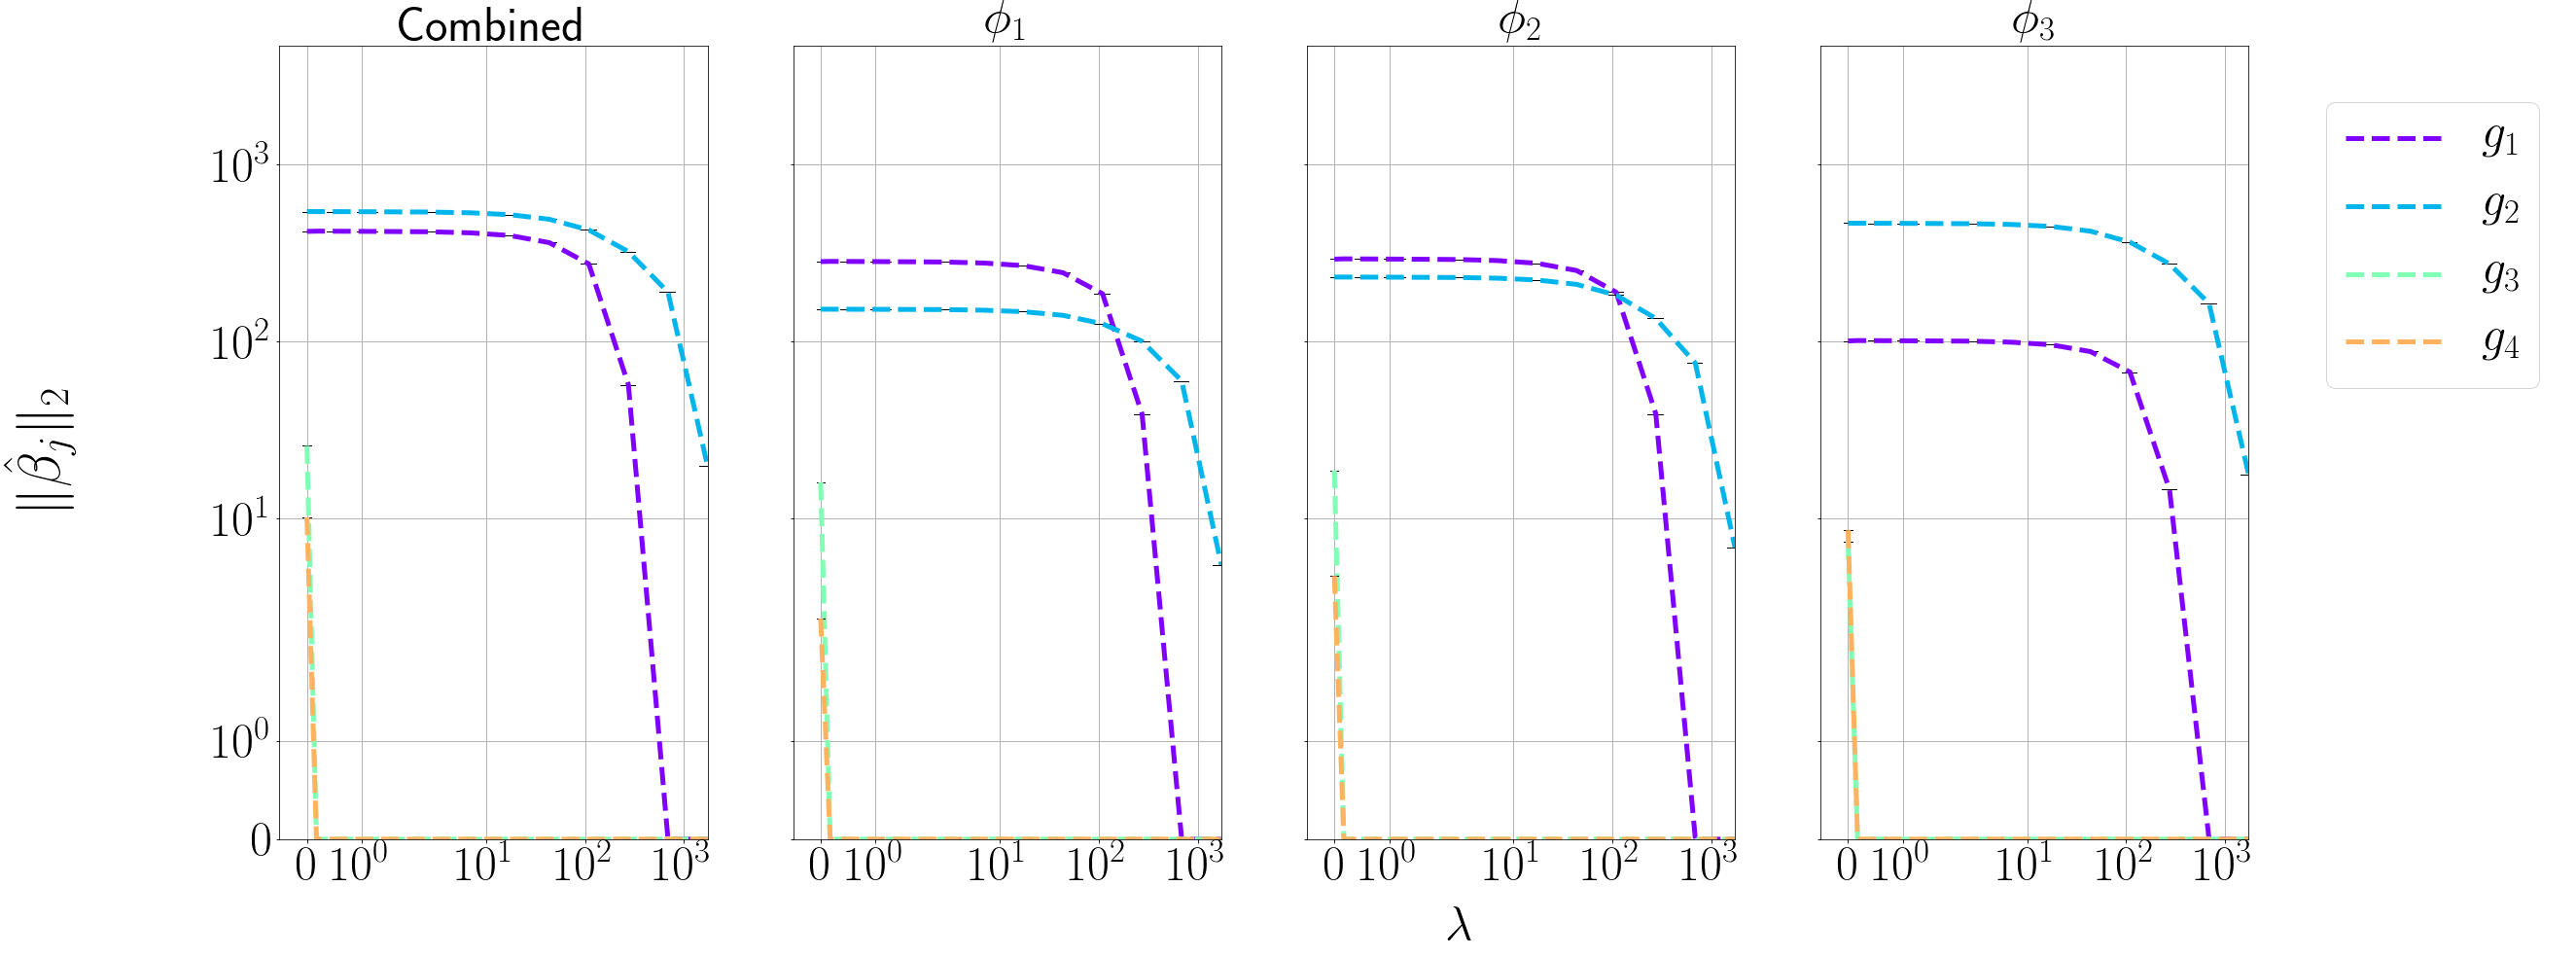

In [13]:
xaxis = np.asarray(lambdas, dtype = np.float64) * np.sqrt(n * n_components)
title ='RigidEthanol'
gnames = np.asarray([r"$\displaystyle g_1$",
	r"$\displaystyle g_2$",
	r"$\displaystyle g_3$",
	r"$\displaystyle g_4$"])
#gnames = np.asarray(list(range(experiment.p)), dtype = str)
#folder = workingdirectory + '/Figures/rigidethanol/' + now
#os.mkdir(folder)
filename = '/Users/samsonkoelle/betassimp'
print('preplot',datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S"))
plot_betas2reorder(experiments, xaxis, title,filename, gnames,nsel)

In [14]:
experiment.Mpca.geom.adjacency_matrix[0].indices

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   91,
         92,   93,   94,   95,   96,   97,   98,   99,  100,  101,  102,
        103,  104,  105,  106,  107,  108,  109,  191,  192,  193,  194,
        195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
        206,  207,  208,  292,  293,  294,  295,  296,  297,  298,  299,
        300,  301,  302,  303,  304,  305,  306,  307,  396,  397,  398,
        399, 9700, 9701, 9702, 9703, 9704, 9793, 9794, 9795, 9796, 9797,
       9798, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9891,
       9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899, 9900, 9901, 9902,
       9903, 9904, 9905, 9906, 9907, 9908, 9909, 9991, 9992, 9993, 9994,
       9995, 9996, 9997, 9998, 9999], dtype=int32)

In [22]:
experiments[0].M.selected_points

array([6306, 9870, 7050, 3237, 7407, 5413, 6708, 3478, 3868, 5294, 4773,
       6702, 8417, 1594, 9095, 7322,  783, 6963, 3065, 1830, 6298,  275,
       6990, 9202, 7435, 6721, 9446,  666, 2305, 6821, 1716, 3511, 1790,
       9738, 5108, 4824, 1962, 3617, 8818, 9592, 5037, 4083, 5340, 6769,
       2399, 3882,  369, 7726, 8127, 3135, 5662, 3284, 5647, 8944, 3057,
       3896, 7871, 8480, 4774, 3958, 7587, 7499, 1194, 8999, 1567, 1573,
       5145, 3737, 6969,  180,  936, 8160, 4446, 5915, 2127, 3388, 1209,
        629, 7598, 5571, 9722, 2663, 3092, 8336,  438, 3352, 2463, 2920,
        792, 6471, 8103, 5277, 5008,  806, 1066, 9144,  242, 9303, 4679,
       8356])

In [16]:
experiments[0].dg_M[0]

array([[ 9.58813595e-03, -6.73569437e-02],
       [ 9.39694790e-02, -1.44341980e-03],
       [-1.53617460e-04,  5.26258248e-05],
       [ 4.48325967e-03, -1.32918584e-04]])

In [17]:
experiments[0].df_M[0]

array([[ 0.086618  , -0.53313118,  3.66849203],
       [ 3.03805825, -0.66642062, -0.48602977]])

In [18]:
experiment.N.geom.rmetric.Gsvals

array([[  7.01194092, 126.80020579],
       [  7.05464797,  76.42791497],
       [  7.00241792, 153.75470945],
       ...,
       [  7.31689431,  97.62765801],
       [  7.42979334, 231.8198125 ],
       [  7.46087611, 197.97529309]])

In [19]:
experiment.N.geom.rmetric.embedding_eigenvectors[0]

array([[-0.98964901,  0.08665717],
       [-0.1135049 , -0.96040937],
       [-0.087815  ,  0.2647723 ]])